# Demonstrate the LQR iterative solution

## Imports

In [1]:
import numpy as np
import parallel_control.lqt_np as lqt_np
import parallel_control.disc as disc
import matplotlib.pyplot as plt

## Create the state space model

In [2]:
    dt = 1.0

    U = 0.1 * np.eye(2)
    X = np.diag(np.array([1.0,1.0,0.01,0.01]))
    F = np.array([[0.0, 0.0, 1.0, 0.0],
                  [0.0, 0.0, 0.0, 1.0],
                  [0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0]])
    Qc = np.diag(np.array([1,1]))

    L = np.array([[0.0,0.0],
                  [0.0,0.0],
                  [1.0,0.0],
                  [0.0,1.0]])

    G = np.array([[0.0,0.0],
                  [0.0,0.0],
                  [1.0,0.0],
                  [0.0,1.0]])

    F, L, Q = disc.lti_disc_u(F, L, G, Qc, dt)

    lqr = lqt_np.LQR(F, L, X, U, X)

## Solve stationary LQR and plot the error as function of number of iterations

[[1.44884795 0.         0.32015621 0.        ]
 [0.         1.44884795 0.         0.32015621]
 [0.32015621 0.         0.30877956 0.        ]
 [0.         0.32015621 0.         0.30877956]]


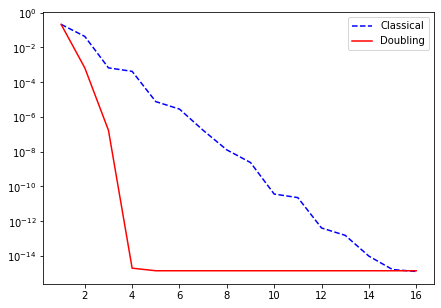

In [3]:
N = 16

iter = np.empty(N)
err1 = np.empty(N)
err2 = np.empty(N)
K0, S0 = lqr.lqrDare()
for n in range(N):
    K1, S1 = lqr.lqrIter(n+1)
    K2, S2 = lqr.lqrDouble(n+1)
    err1[n] = np.linalg.norm(S1 - S0)
    err2[n] = np.linalg.norm(S2 - S0)
    iter[n] = n+1

fig, ax = plt.subplots(figsize=(7, 5))
ax.semilogy(iter, err1, label="Classical", color="b", linestyle="--")
ax.semilogy(iter, err2, label="Doubling", color="r", linestyle="-")
_ = plt.legend()

print(S0)